In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
#from mayavi import mlab
import seaborn as sns
from vtk_rw import read_vtk, write_vtk
from plotting import plot_surf_stat_map, crop_img

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [12]:
def custom_plot(data, column, hemi):
    sns.set_style('white')
    
    if hemi == 'right':
        lat=plot_surf_stat_map(v, f, stat_map=data[:,column], bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(11,10.5) ,threshold=1e-50, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data[:,column], bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(11,10.5), threshold=1e-50, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()
        
        
    elif hemi == 'left':
        lat=plot_surf_stat_map(v, f, stat_map=data[:,column], bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                            elev=180,azim=0, figsize=(11,9) ,threshold=1e-50, cmap='jet') 

        sns.set_style('white')
        med=plot_surf_stat_map(v, f, stat_map=data[:,column], bg_map=sulc, bg_on_stat=True,darkness=0.5,
                elev=180,azim=180, figsize=(11,9), threshold=1e-50, cmap='jet')

        lat_crop=crop_img(lat)
        med_crop=crop_img(med)

        fig=plt.figure()
        fig.set_size_inches(16, 8)
        ax1 = fig.add_subplot(121)
        plt.imshow(lat_crop)
        ax1.set_axis_off()
        ax2 = fig.add_subplot(122)
        plt.imshow(med_crop)
        ax2.set_axis_off()

In [19]:
def plot_top(data, column):
    sns.set_style('white')
    fig=plot_surf_stat_map(v, f, stat_map=data[:,column], bg_map=sulc, bg_on_stat=True, darkness=0.5, 
                    elev=270,azim=90, figsize=(10,8),cmap='jet', threshold=1e-50)
    
    fig_crop=crop_img(fig)
    fig=plt.figure()
    fig.set_size_inches(8, 8)
    ax1 = fig.add_subplot(111)
    plt.imshow(fig_crop)
    ax1.set_axis_off()

In [22]:
mesh_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/rh_lowres_new.vtk'
sulc_file='/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/sulc/rh_sulc.npy'
mask_file='/scr/ilz3/myelinconnect/new_groupavg/masks/rh_fullmask.npy'
data_file='/scr/ilz3/myelinconnect/new_groupavg/embed/rh_smooth_3_embed.npy'
dict_file='/scr/ilz3/myelinconnect/new_groupavg/embed/rh_smooth_3_embed_dict.pkl'

In [23]:
data=np.load(data_file)
sulc=np.load(sulc_file)
mask=np.load(mask_file)
v, f, d = read_vtk(mesh_file)

In [24]:
import pickle
pkl_file = open(dict_file, 'rb')
res = pickle.load(pkl_file)
pkl_file.close()
eigenval=res['lambdas']

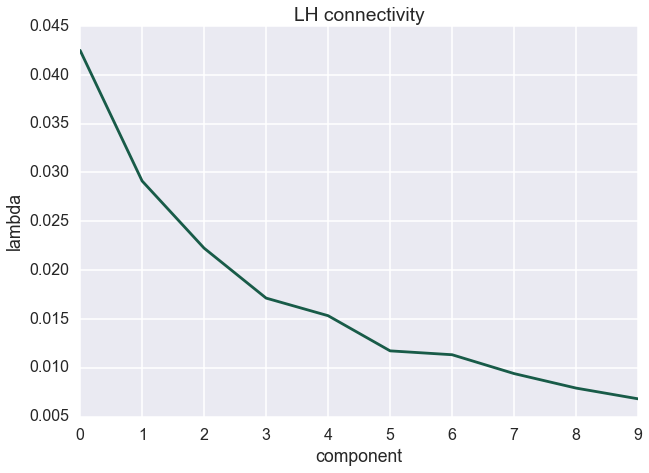

In [25]:
sns.set_context('poster')
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,7))
plt.plot(eigenval, color=sns.color_palette('cubehelix', 10)[2])
plt.ylabel('lambda')
plt.xlabel('component')
plt.title('LH connectivity')

In [26]:
data[mask]=0

ERROR! Session/line number was not unique in database. History logging moved to new session 2012


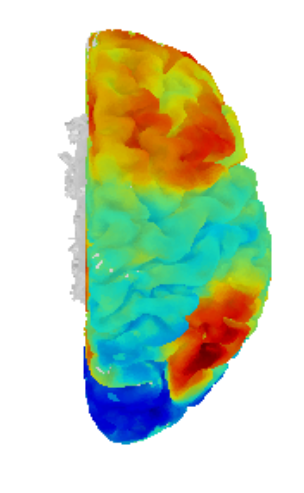

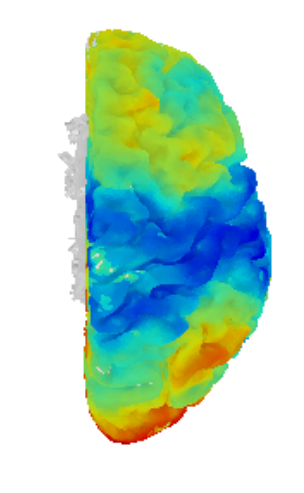

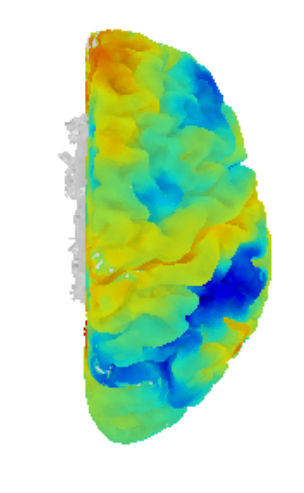

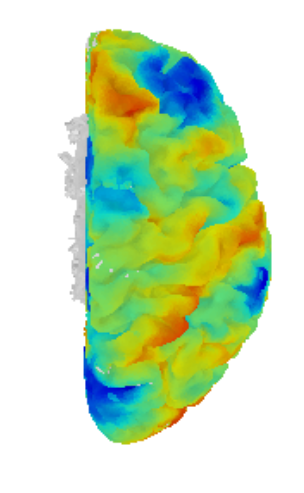

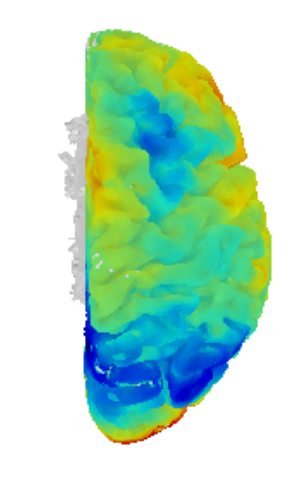

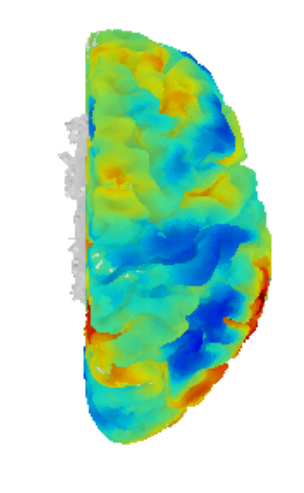

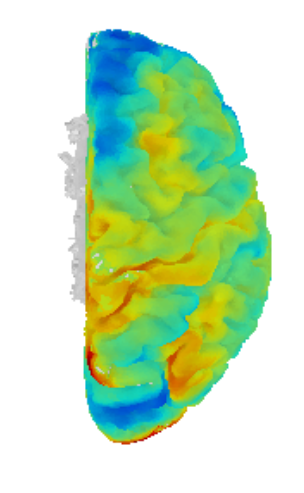

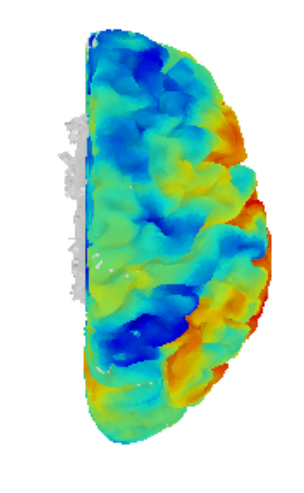

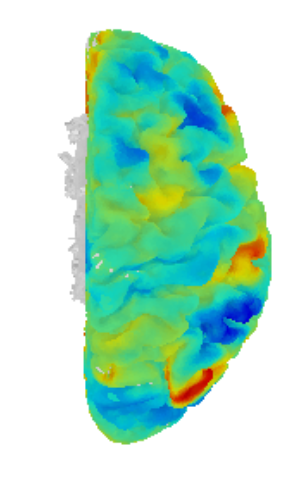

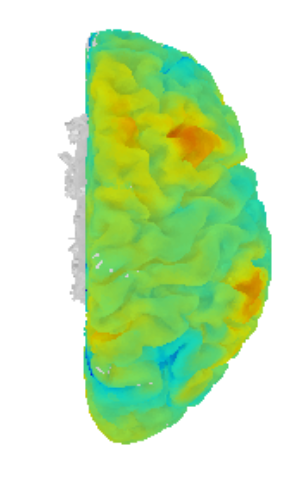

In [27]:
for column in range(10):
    plot_top(data, column)

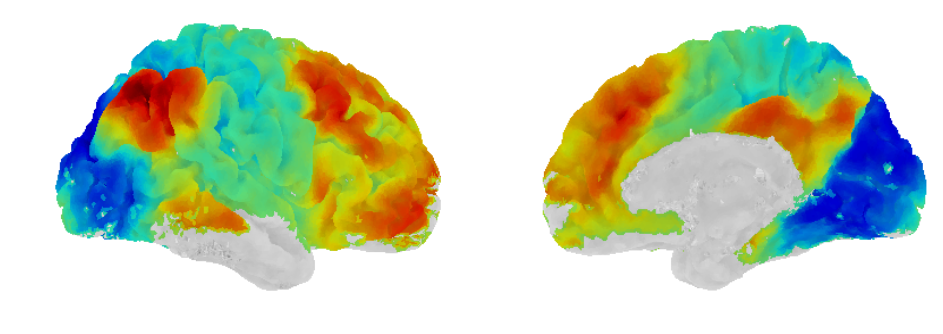

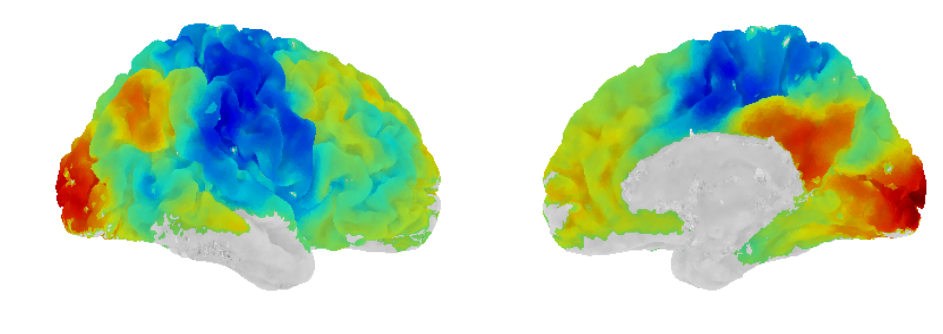

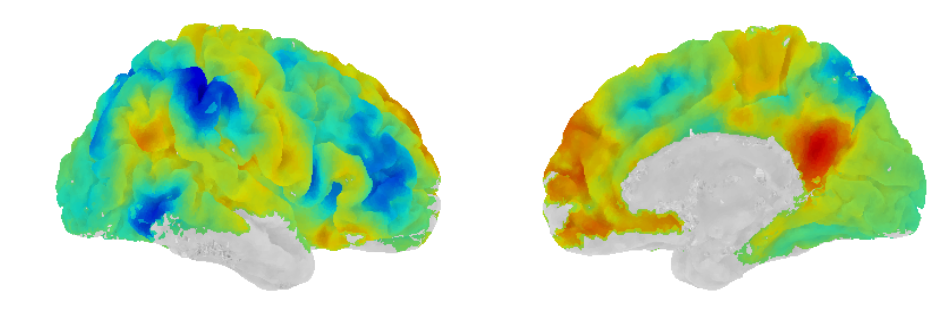

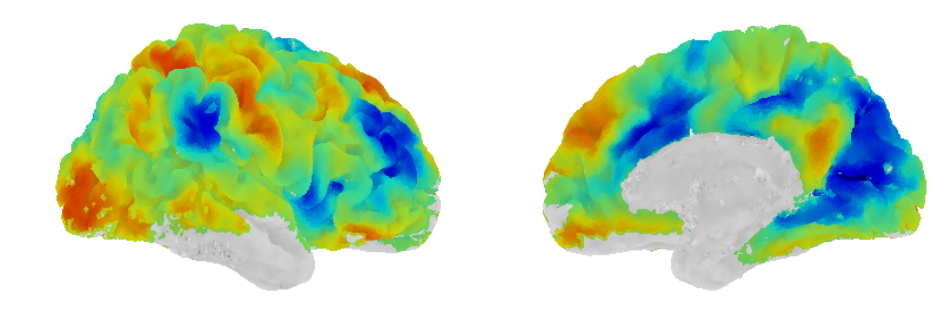

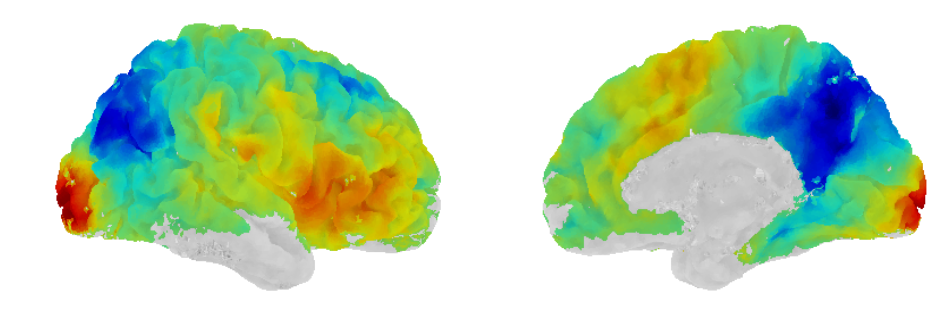

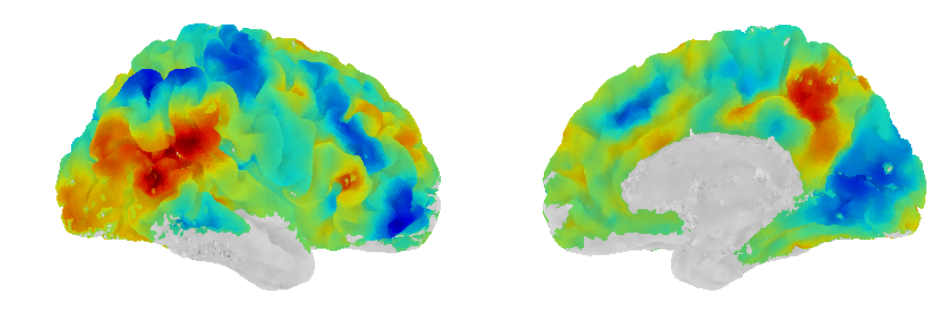

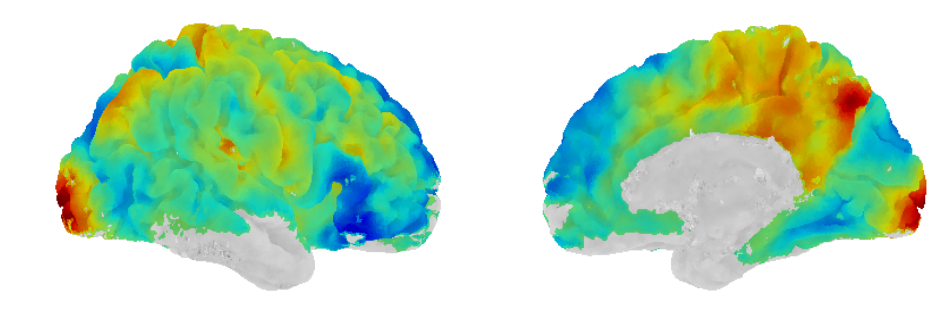

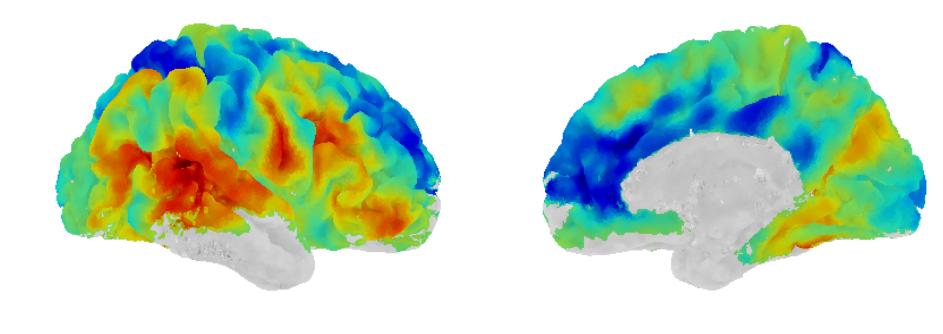

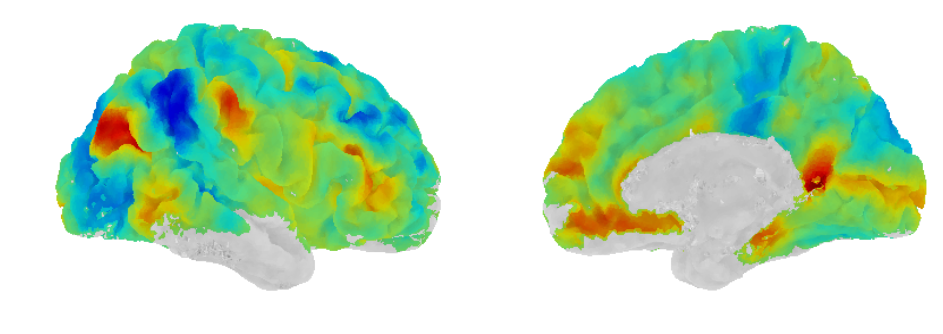

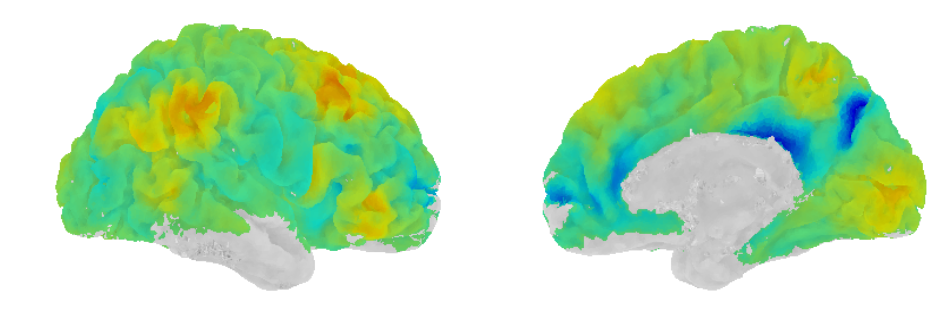

In [28]:
for column in range(10):
    custom_plot(data, column, 'right')